In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import dask
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [2]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw.nc').budg_fw
budgH = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_heat.nc').budg_heat

In [3]:
flx = xr.open_dataset('/mnt/efs/data/ecco/ecco_section_transports_fw.nc')
nc = xr.open_dataset('/mnt/efs/data/ecco/ecco_section_transports_heat.nc')
flx['heat'] = nc.heat

### Plot

In [5]:
class OffsetYearLocator(dates.YearLocator):
    def __init__(self, *args, **kwargs):
        self.offset = kwargs.pop("offset", 0)
        dates.YearLocator.__init__(self,*args, **kwargs)
    def tick_values(self, vmin, vmax):
        ymin = self.base.le(vmin.year) * self.base.step - self.offset
        ymax = self.base.ge(vmax.year) * self.base.step + (self.base.step-self.offset)
        ticks = [vmin.replace(year=ymin, **self.replaced)]
        while True:
            dt = ticks[-1]
            if dt.year >= ymax:
                return dates.date2num(ticks)
            year = dt.year + self.base.step
            ticks.append(dt.replace(year=year, **self.replaced))

def format_xaxis(ax):

    years = dates.YearLocator(10,month=1,day=1)
    years1=OffsetYearLocator(2,month=1,day=1, offset=1)
    dfmt = dates.DateFormatter('%Y')
    dfmt1 = dates.DateFormatter('%y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(years1)
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_minor_formatter(dfmt1)
    ax.get_xaxis().set_tick_params(which='major', pad=15)

    plt.setp(ax.get_xmajorticklabels(), rotation=0, weight="bold", ha="center")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


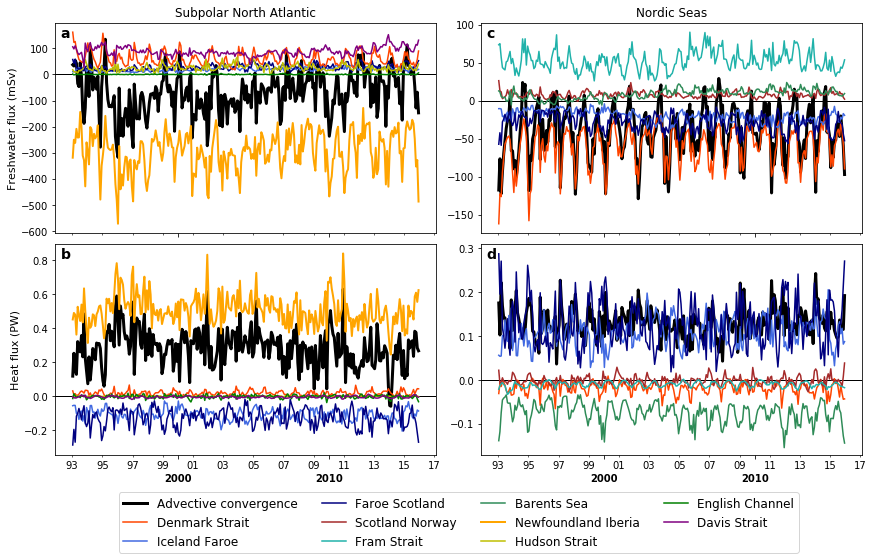

In [6]:
fig, axs = plt.subplots(2, 2,sharex=True, figsize=(14, 8))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(budgFw.time, budgFw.sel(region='spna',term='adv_ConvFw')*1e3, lw=3, color='k',
              label='Advective convergence')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw*1e3, lw=2, color='orange',
              label='Newfoundland Iberia')
axs[0,0].plot(flx.time, -flx.sel(section='Iceland Faroe').fw*1e3, lw=1.5, color='royalblue',
              label='Iceland Faroe')
axs[0,0].plot(flx.time, -flx.sel(section='Faroe Scotland').fw*1e3, lw=1.5, color='navy',
              label='Faroe Scotland')
axs[0,0].plot(flx.time, -flx.sel(section='Denmark Strait').fw*1e3, lw=1.5, color='orangered',
              label='Denmark Strait')
axs[0,0].plot(flx.time, -flx.sel(section='Hudson Strait').fw*1e3, lw=1.5, color='y',
              label='Hudson Strait')
axs[0,0].plot(flx.time, flx.sel(section='English Channel').fw*1e3, lw=1.5, color='g',
              label='English Channel')
axs[0,0].plot(flx.time, -flx.sel(section='Davis Strait').fw*1e3, lw=1.5, color='purple',
              label='Davis Strait')
axs[0,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=11)
axs[0,0].text(0.013,0.93, 'a', fontsize=14, fontweight='bold', transform=axs[0,0].transAxes)
axs[0,0].set_title(r'Subpolar North Atlantic', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(budgH.time, budgH.sel(region='spna',term='adv_ConvH')*1e-15, lw=3, color='k',
              label='Advective convergence')
axs[1,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').heat,lw=2,color='orange',label='Newfoundland Iberia')
axs[1,0].plot(flx.time, -flx.sel(section='Iceland Faroe').heat, lw=1.5, color='royalblue',label='Iceland Faroe')
axs[1,0].plot(flx.time, -flx.sel(section='Faroe Scotland').heat, lw=1.5, color='navy',label='Faroe Scotland')
axs[1,0].plot(flx.time, -flx.sel(section='Denmark Strait').heat, lw=1.5, color='orangered',label='Denmark Strait')
axs[1,0].plot(flx.time, -flx.sel(section='Hudson Strait').heat, lw=1.5, color='y',label='Hudson Strait')
axs[1,0].plot(flx.time, flx.sel(section='English Channel').heat, lw=1.5, color='g',label='English Channel')
axs[1,0].plot(flx.time, -flx.sel(section='Davis Strait').heat, lw=1.5, color='purple',label='Davis Strait')
axs[1,0].set_ylabel(r'Heat flux (PW)', fontsize=11)
axs[1,0].text(0.013,0.93, 'b', fontsize=14, fontweight='bold', transform=axs[1,0].transAxes)
format_xaxis(axs[1,0])

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(budgFw.time, budgFw.sel(region='nsea',term='adv_ConvFw')*1e3, lw=3, color='k',
              label='Advective convergence')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw*1e3, lw=1.5, color='orangered',label='Denmark Strait')
axs[0,1].plot(flx.time, flx.sel(section='Iceland Faroe').fw*1e3, lw=1.5, color='royalblue',label='Iceland Faroe')
axs[0,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw*1e3, lw=1.5, color='navy',label='Faroe Scotland')
axs[0,1].plot(flx.time, flx.sel(section='Scotland Norway').fw*1e3, lw=1.5, color='brown',label='Scotland Norway')
axs[0,1].plot(flx.time, -flx.sel(section='Fram Strait').fw*1e3, lw=1.5, color='lightseagreen',label='Fram Strait')
axs[0,1].plot(flx.time, -flx.sel(section='Barents Sea').fw*1e3, lw=1.5, color='seagreen',label='Barents Sea')
axs[0,1].text(0.013,0.93, 'c', fontsize=14, fontweight='bold', transform=axs[0,1].transAxes)
axs[0,1].set_title(r'Nordic Seas', fontsize=12)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(budgH.time, budgH.sel(region='nsea',term='adv_ConvH')*1e-15, lw=3, color='k',
              label='Advective convergence')
axs[1,1].plot(flx.time, flx.sel(section='Denmark Strait').heat, lw=1.5, color='orangered',label='Denmark Strait')
axs[1,1].plot(flx.time, flx.sel(section='Iceland Faroe').heat, lw=1.5, color='royalblue',label='Iceland Faroe')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').heat, lw=1.5, color='navy',label='Faroe Scotland')
axs[1,1].plot(flx.time, flx.sel(section='Scotland Norway').heat, lw=1.5, color='brown',label='Scotland Norway')
axs[1,1].plot(flx.time, -flx.sel(section='Fram Strait').heat, lw=1.5, color='lightseagreen',label='Fram Strait')
axs[1,1].plot(flx.time, -flx.sel(section='Barents Sea').heat, lw=1.5, color='seagreen',label='Barents Sea')
axs[1,1].text(0.013,0.93, 'd', fontsize=14, fontweight='bold', transform=axs[1,1].transAxes)
format_xaxis(axs[1,1])
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.95, hspace=0.05, wspace=0.12)

# Add lines outlide of plot for legend
axs[1,1].plot(flx.time[:2], [-1,-1],lw=2,color='orange',label='Newfoundland Iberia')
axs[1,1].plot(flx.time[:2], [-1,-1], lw=1.5, color='y',label='Hudson Strait')
axs[1,1].plot(flx.time[:2], [-1,-1], lw=1.5, color='g',label='English Channel')
axs[1,1].plot(flx.time[:2], [-1,-1], lw=1.5, color='purple',label='Davis Strait')
axs[1,1].set_ylim([-0.17,0.31])

axs[1,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.85, -0.15), ncol=4, fontsize=12)
#fig.legend(handles=[p1,p2,p3], labels=['Advective convergence','Newfoundland Iberia', 'Faroe Scotland'])#,
#           frameon=True, fancybox=True,
#           bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
plt.savefig('/mnt/efs/figure.pdf')
plt.show()

In [7]:
adv_ConvFw_spna = flx.sel(section='Newfoundland Iberia').fw + flx.sel(section='English Channel').fw \
                    - flx.sel(section='Hudson Strait').fw - flx.sel(section='Davis Strait').fw \
                    - flx.sel(section='Denmark Strait').fw - flx.sel(section='Iceland Faroe').fw \
                    - flx.sel(section='Faroe Scotland').fw

adv_ConvFw_nsea = flx.sel(section='Denmark Strait').fw + flx.sel(section='Iceland Faroe').fw \
                    + flx.sel(section='Faroe Scotland').fw + flx.sel(section='Scotland Norway').fw \
                    - flx.sel(section='Fram Strait').fw - flx.sel(section='Barents Sea').fw

adv_ConvH_spna = flx.sel(section='Newfoundland Iberia').heat + flx.sel(section='English Channel').heat \
                    - flx.sel(section='Hudson Strait').heat - flx.sel(section='Davis Strait').heat \
                    - flx.sel(section='Denmark Strait').heat - flx.sel(section='Iceland Faroe').heat \
                    - flx.sel(section='Faroe Scotland').heat

adv_ConvH_nsea = flx.sel(section='Denmark Strait').heat + flx.sel(section='Iceland Faroe').heat \
                    + flx.sel(section='Faroe Scotland').heat + flx.sel(section='Scotland Norway').heat \
                    - flx.sel(section='Fram Strait').heat - flx.sel(section='Barents Sea').heat

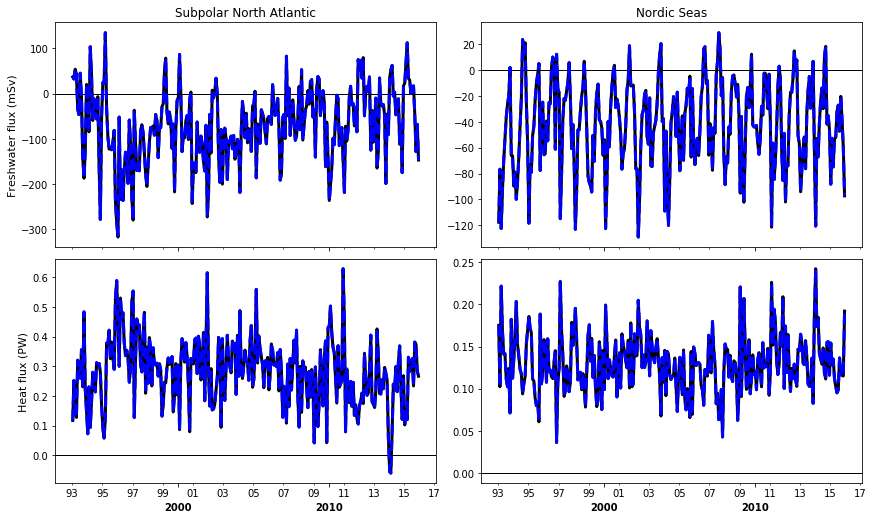

In [8]:
fig, axs = plt.subplots(2, 2,sharex=True, figsize=(14, 8))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(budgFw.time, budgFw.sel(region='spna',term='adv_ConvFw')*1e3, lw=3, color='k',
              label='Advective convergence')
axs[0,0].plot(adv_ConvFw_spna.time, adv_ConvFw_spna*1e3, lw=3, color='b',ls='--',label='Total boundary flux')
axs[0,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=11)
axs[0,0].set_title(r'Subpolar North Atlantic', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(budgH.time, budgH.sel(region='spna',term='adv_ConvH')*1e-15, lw=3, color='k',
              label='Advective convergence')
axs[1,0].plot(adv_ConvH_spna.time, adv_ConvH_spna, lw=3, color='b',ls='--',label='Total boundary flux')
axs[1,0].set_ylabel(r'Heat flux (PW)', fontsize=11)
format_xaxis(axs[1,0])

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(budgFw.time, budgFw.sel(region='nsea',term='adv_ConvFw')*1e3, lw=3, color='k',
              label='Advective convergence')
axs[0,1].plot(adv_ConvFw_nsea.time, adv_ConvFw_nsea*1e3, lw=3, color='b',ls='--',label='Total boundary flux')
axs[0,1].set_title(r'Nordic Seas', fontsize=12)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(budgH.time, budgH.sel(region='nsea',term='adv_ConvH')*1e-15, lw=3, color='k',
              label='Advective convergence')
axs[1,1].plot(adv_ConvH_nsea.time, adv_ConvH_nsea, lw=3, color='b',ls='--',label='Total boundary flux')
format_xaxis(axs[1,1])
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.05, wspace=0.12)

plt.show()

In [7]:
adv_ConvFw_spna = budgFw.groupby('time.year').mean('time').sel(region='spna',term='adv_ConvFw')*1e3
adv_ConvFw_nsea = budgFw.groupby('time.year').mean('time').sel(region='nsea',term='adv_ConvFw')*1e3
adv_ConvFw_lsea = budgFw.groupby('time.year').mean('time').sel(region='lsea',term='adv_ConvFw')*1e3

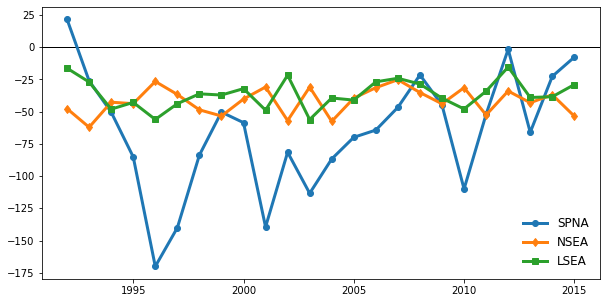

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')

ax.plot(adv_ConvFw_spna.year, adv_ConvFw_spna, lw=3, linestyle='-', marker='o', label='SPNA')
ax.plot(adv_ConvFw_nsea.year, adv_ConvFw_nsea, lw=3, linestyle='-', marker='d', label='NSEA')
ax.plot(adv_ConvFw_lsea.year, adv_ConvFw_lsea, lw=3, linestyle='-', marker='s', label='LSEA')
ax.legend(loc='lower right',frameon=False,fontsize=12)

plt.show()

In [9]:
print('Davis Strait (2010 to 2015):', np.round((flx_DaS.sel(year=2015) - flx_DaS.sel(year=2010)).values))
print('Fram Strait (2010 to 2015):',  np.round((flx_FrS.sel(year=2015) - flx_FrS.sel(year=2010)).values))

Davis Strait (2010 to 2015): -24.0
Fram Strait (2010 to 2015): 11.0


In [10]:
print('Adv. Conv. (SPNA, 2010 to 2015):',
      np.round((adv_ConvFw_spna.sel(year=2015)-adv_ConvFw_spna.sel(year=2010)).values))
print('Adv. Conv. (NSEA, 2010 to 2015):',
      np.round((adv_ConvFw_nsea.sel(year=2015)-adv_ConvFw_nsea.sel(year=2010)).values))
print('Adv. Conv. (LSEA, 2010 to 2015):',
      np.round((adv_ConvFw_lsea.sel(year=2015)-adv_ConvFw_lsea.sel(year=2010)).values))

Adv. Conv. (SPNA, 2010 to 2015): 102.0
Adv. Conv. (NSEA, 2010 to 2015): -22.0
Adv. Conv. (LSEA, 2010 to 2015): 19.0


### Mean trasnports

In [11]:
# Convert freshwater fluxes to mSv
flx['fw'].values = flx['fw'].values*1e3

In [12]:
# Convert heat fluxes to TW
flx['heat'].values = flx['heat'].values*1e3

In [13]:
flx.mean('time').to_dataframe()

,vol,fw,heat
section,,,
Davis Strait,-1.551961,-95.310167,7.501151
Denmark Strait,-5.441123,-65.392277,5.344765
Iceland Faroe,3.590563,-20.582047,113.611337
Faroe Scotland,2.159763,-27.967610,127.599248
Scotland Norway,0.070494,8.325159,-1.319389
Fram Strait,-2.888645,-59.014984,10.826128
Barents Sea,3.328499,-10.197882,78.632877
Labrador Greenland,-1.609011,-152.254465,62.198394
Hudson Strait,-0.029883,-28.543961,0.486866


In [14]:
flx.std('time').to_dataframe()*2.0

,vol,fw,heat
section,,,
Davis Strait,0.611628,32.977572,9.531624
Denmark Strait,2.648102,51.813052,31.365672
Iceland Faroe,1.800097,14.659503,59.993313
Faroe Scotland,3.852182,22.473776,106.580522
Scotland Norway,0.411735,8.185095,20.671484
Fram Strait,1.962949,29.057592,12.897385
Barents Sea,2.145237,12.211984,46.656214
Labrador Greenland,0.634302,99.214702,59.940675
Hudson Strait,0.096220,22.445210,3.794591


### Climatology (annual cycle)

In [10]:
flx_clim = flx.groupby('time.month').mean('time')

In [11]:
import calendar

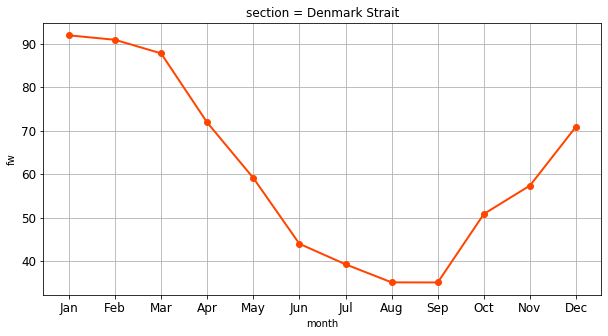

In [21]:
(flx_clim.sel(section='Denmark Strait').fw*-1*1e3).plot(lw=2, color='orangered', marker='.', ms=12, figsize=(10,5))
plt.xticks(np.arange(1,13))
plt.setp(plt.gca(), 'xticklabels', calendar.month_abbr[1:13])
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.show()

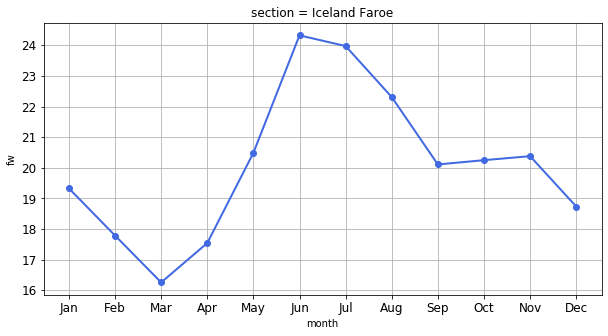

In [20]:
(flx_clim.sel(section='Iceland Faroe').fw*-1*1e3).plot(lw=2, color='royalblue', marker='.', ms=12, figsize=(10,5))
plt.xticks(np.arange(1,13))
plt.setp(plt.gca(), 'xticklabels', calendar.month_abbr[1:13])
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.show()

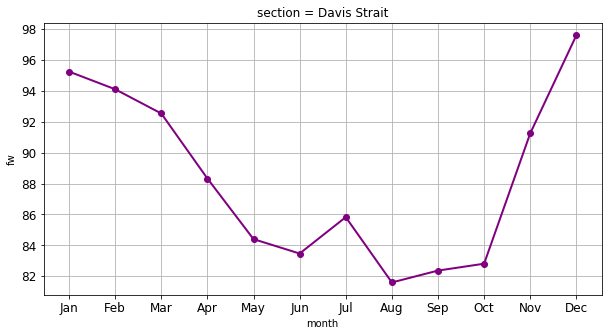

In [17]:
(flx_clim.sel(section='Davis Strait').fw*-1*1e3).plot(lw=2, color='purple', marker='.',ms=12,figsize=(10,5))

plt.xticks(np.arange(1,13))
plt.setp(plt.gca(), 'xticklabels', calendar.month_abbr[1:13])
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.show()

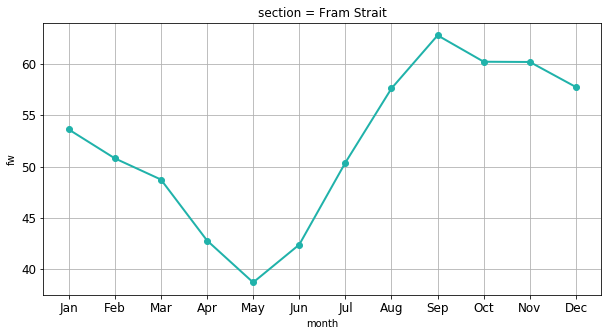

In [24]:
(flx_clim.sel(section='Fram Strait').fw*-1*1e3).plot(lw=2, color='lightseagreen', marker='.', ms=12, figsize=(10,5))
plt.xticks(np.arange(1,13))
plt.setp(plt.gca(), 'xticklabels', calendar.month_abbr[1:13])
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.show()